In [20]:

!pip install prophet tsfresh


In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

from prophet import Prophet


In [22]:
hr = pd.read_csv("heartrate_seconds_merged.csv", skiprows=[1])
hr = hr.reset_index()
hr['Time'] = pd.to_datetime(hr['level_1'])
hr = hr.sort_values('Time')
hr.head()

,level_0,level_1,heartrate_seconds_merged,Time
309277,4020332650,4/12/2016 12:00:00 AM,63,2016-04-12 00:00:00
309278,4020332650,4/12/2016 12:00:01 AM,64,2016-04-12 00:00:01
309279,4020332650,4/12/2016 12:00:03 AM,64,2016-04-12 00:00:03
309280,4020332650,4/12/2016 12:00:06 AM,64,2016-04-12 00:00:06
309281,4020332650,4/12/2016 12:00:09 AM,63,2016-04-12 00:00:09


In [23]:
import pandas as pd
from scipy.stats import skew, kurtosis
hr = pd.read_csv("heartrate_seconds_merged.csv", skiprows=[1])
hr = hr.reset_index()
hr['Time'] = pd.to_datetime(hr['level_1'])
hr = hr.sort_values('Time')

def extract_features(series):
    return {
        "mean": series.mean(),
        "std": series.std(),
        "min": series.min(),
        "max": series.max(),
        "skewness": skew(series),
        "kurtosis": kurtosis(series)
    }

features = extract_features(hr["heartrate_seconds_merged"])
feature_df = pd.DataFrame([features])
feature_df

,mean,std,min,max,skewness,kurtosis
0,77.09264,17.061335,38,203,0.987389,2.108047


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


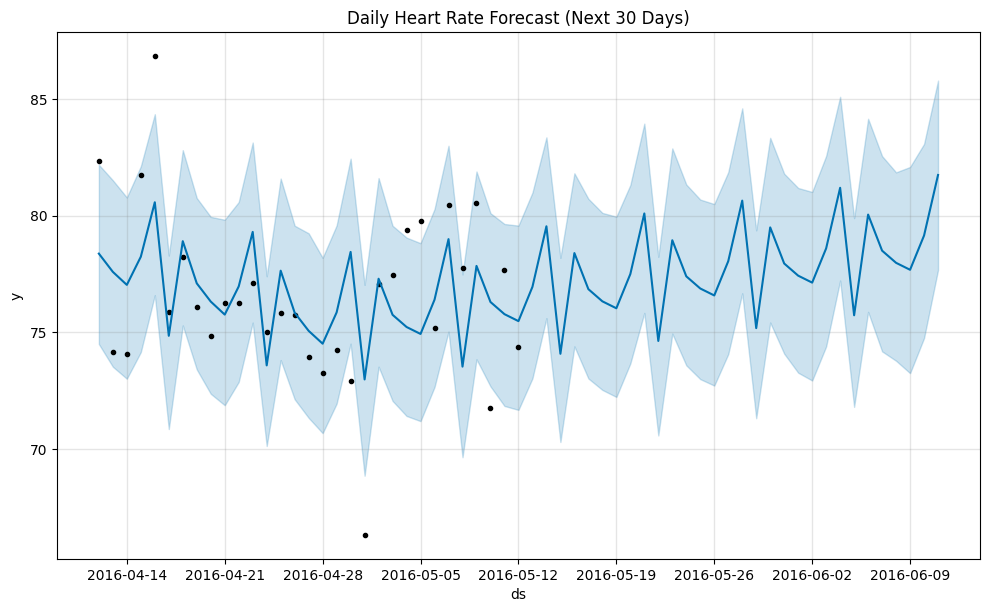

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

hr = pd.read_csv("heartrate_seconds_merged.csv", skiprows=[1])
hr = hr.reset_index()
hr['Time'] = pd.to_datetime(hr['level_1'])
hr = hr.rename(columns={
    'Time': 'date',
    'heartrate_seconds_merged': 'value' # Correct column name for values
})
hr = hr.sort_values('date')
daily_hr = hr.resample('D', on='date')['value'].mean().reset_index()
prophet_df = daily_hr.rename(columns={
    'date': 'ds',
    'value': 'y'
})

model = Prophet()
model.fit(prophet_df)
future = model.make_future_dataframe(periods=30, freq='D')
forecast = model.predict(future)
model.plot(forecast)
plt.title("Daily Heart Rate Forecast (Next 30 Days)")
plt.show()

In [25]:
import pandas as pd
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def extract_features(series):
    return {
        "mean": series.mean(),
        "std": series.std(),
        "min": series.min(),
        "max": series.max(),
        "skewness": skew(series),
        "kurtosis": kurtosis(series)
    }
user_features_list = hr.groupby('level_0')['value'].apply(extract_features).reset_index()
feature_df = pd.DataFrame(user_features_list['value'].tolist(), index=user_features_list['level_0'])
feature_df = feature_df.fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_df)

kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_scaled)
labels

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

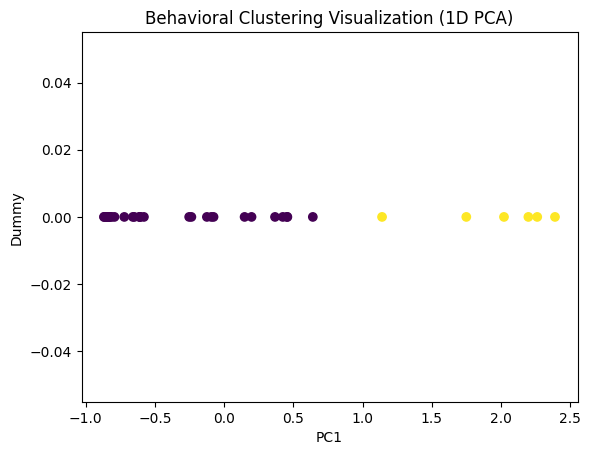

In [26]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy

pca = PCA(n_components=1) # Changed n_components to 1 to resolve the error
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], np.zeros_like(X_pca[:, 0]), c=labels) # Adjusted for 1D PCA result
plt.xlabel("PC1")
plt.ylabel("Dummy")
plt.title("Behavioral Clustering Visualization (1D PCA)")
plt.show()